In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [7]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
data.shape

(200, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc5f0080730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc5f0080df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc5f00803d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc61866b4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc61866b850>],
 'means': []}

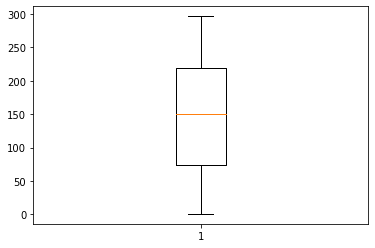

In [9]:
plt.boxplot(data['TV']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc61862ad60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6186393d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc61862aac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc618639a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc618639df0>],
 'means': []}

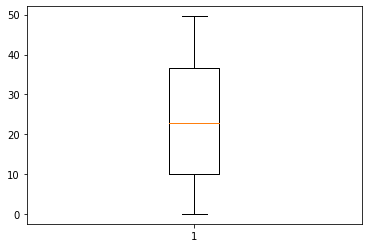

In [10]:
plt.boxplot(data['radio']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc61873a820>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc61873aee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc61873a4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc618746520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc618746880>],
 'means': []}

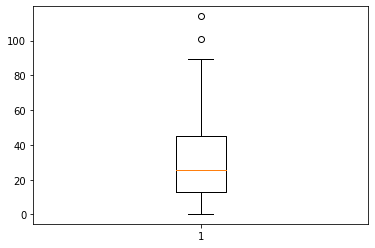

In [11]:
plt.boxplot(data['newspaper']) 

In [12]:
## Newspaper has few outlier values (only upper outliers)
#we need to handle it

#how will you do this?


In [13]:
desc = data['newspaper'].describe()
desc

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

In [15]:
IQR = desc['75%'] - desc['25%']
upper_limit = desc['75%'] + 1.5*IQR

In [16]:
#replace the outlier values with upper limit values.

In [17]:
data['newspaper'][data['newspaper']>upper_limit] = upper_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc652bdb1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc652bdb850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc652bcce50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc652bdbe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc652be81f0>],
 'means': []}

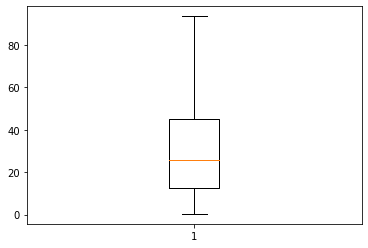

In [18]:
plt.boxplot(data['newspaper'])  #outlier values are removed

In [20]:
data.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.231432
sales        1.000000
Name: sales, dtype: float64

In [21]:
#splitting into input and output vectors

In [22]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
y = data['sales']
X = data.drop('sales',axis = 1)

In [24]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
X.shape

(200, 3)

In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [28]:
#import train_test_split to split the data for training and testing

from sklearn.model_selection import train_test_split #we are only importing  train_test_split function from sklearn within the class model_selection

#train_test_split is splitiing the data randomnly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #75% data will be for training and 25% data for testing

In [29]:
from sklearn.linear_model import LinearRegression  #importing LinearRegression from sklearn within the class linear_model

In [30]:
lin_reg = LinearRegression() #creating object of LinearRegression

In [31]:
lin_reg.fit(X_train,y_train) #training and fitting LR object using training data

LinearRegression()

In [32]:
m  = lin_reg.coef_
print(m)

[ 0.04692572  0.18897116 -0.00037403]


In [33]:
c = lin_reg.intercept_
c

2.574263246478349

In [34]:
ypred=lin_reg.predict(X_test)  #ypred consist of the predicted salary corresponding to X_test

In [35]:
ypred

array([19.09845827, 20.48909803,  7.56923307, 23.79442502,  9.09838213,
       20.709304  , 17.17727724, 23.24154761,  9.87074072, 17.46613765,
        5.06085737, 11.57557236, 17.19798922,  7.40767895,  8.15579941,
        8.59246189, 11.19657721,  8.89549701, 19.36193539,  4.95659213,
       20.73768676, 11.81346209, 16.98838158,  3.25500337, 16.2789589 ,
       14.6985214 ,  9.82141764,  7.62256919, 11.34541797,  8.54696239,
       10.25560482,  6.76303443, 15.07480055, 14.1798834 , 14.07784506,
       16.80338111,  4.1593319 , 15.21099445, 17.68521641, 10.84981387,
       18.10069296, 19.20220136, 12.63515364,  7.91079201, 12.6371525 ,
       14.66939229, 23.37380446, 13.80449247, 18.3591727 , 13.86067795])

In [36]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE for Testing:",MSE)

MSE for Testing: 2.0424667288495097


In [38]:
#Training Error
y_pred_training = lin_reg.predict(X_train)
MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",MSE_training)

MSE for Training: 3.0808428649088984


In [39]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

2.0424667288495097

In [41]:
lin_reg.score(X_train,y_train)

0.8871309655636671

In [42]:
lin_reg.score(X_test,y_test)  #R-square value

0.922781265312639

#### R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression


R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.

100% indicates that the model explains all the variability of the response data around its mean.

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.922781265312639

In [44]:
#END